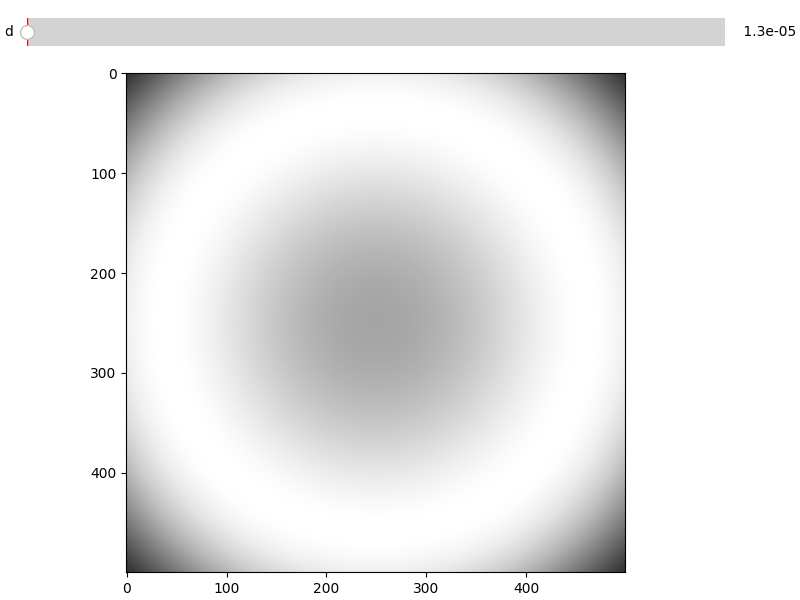

In [6]:
%matplotlib widget
import numpy as np
import matplotlib.pyplot as plt
from scipy.constants import pi
from matplotlib.widgets import Slider


w0 = 0.02
L = 0.10
lambda_ = 540e-9
k = 2 * pi / lambda_
I0 = 1
d0 = 1e-6
d_min, d_max = (1.25e-5, 1.5e-5)

def Delta_p(theta, d=d0):
    return 2 * d * np.cos(theta)

def I(theta, _lambda, d=d0, I0=1):
    Delta_r = _lambda / 2
    Delta = Delta_r + Delta_p(theta, d)
    _delta = k * Delta
    I = 4 * I0 * np.cos(_delta / 2)**2
    return I

angular_range = 2 * np.arctan(w0 / L)
theta = np.linspace(-angular_range, angular_range, 500)
THETA_x, THETA_y = np.meshgrid(theta, theta)
THETA = np.sqrt(THETA_x**2 + THETA_y**2)
I_ = I(THETA, lambda_)
#print(I_)

fig = plt.figure(figsize=(8,6), constrained_layout=True)

gs = plt.GridSpec(10, 2, figure=fig)
ax1 = fig.add_subplot(gs[0, :])
ax2 = fig.add_subplot(gs[1:, :])
text = ax2.text(0, 0, "", va="bottom", ha="left")

ax1.spines['top'].set_visible(True)
ax1.spines['right'].set_visible(True)
d_slider = Slider(ax=ax1, label='d', valmin=d_min, valmax=d_max, valinit=d0, valfmt=' %2.1e', facecolor='#cc7000')


color_norm = plt.Normalize(0, 4)
#fig.colorbar(im, cax=ax2, orientation='vertical')
im  = ax2.imshow(I_, cmap=plt.cm.gist_gray, norm=color_norm)


def update(val):
    d_ = d_slider.val
    I_ = I(THETA, lambda_, d=d_)
    im.set_data(I_)
    fig.canvas.draw_idle()

d_slider.on_changed(update)
d_step = (d_max - d_min) / 100


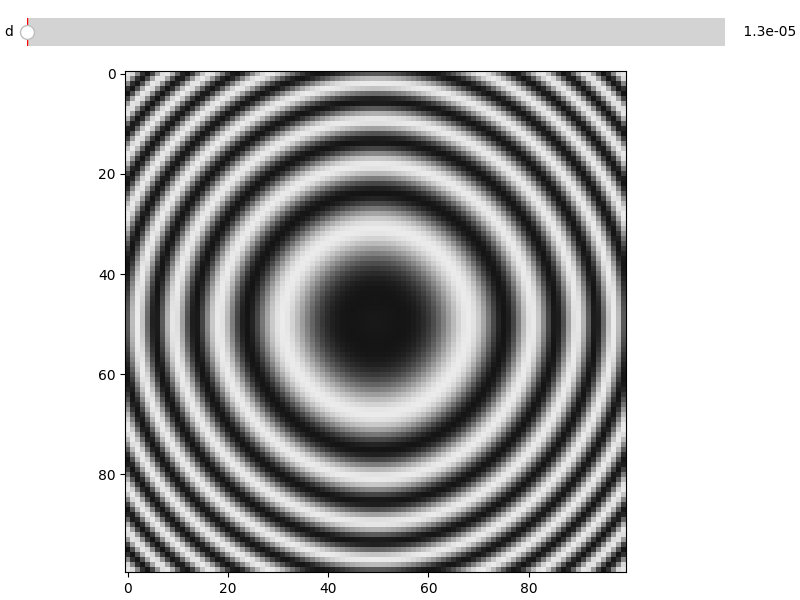

In [5]:
%matplotlib widget
import numpy as np
import matplotlib.pyplot as plt
from scipy.constants import pi
from matplotlib.widgets import Slider


w0 = 0.02
L = 0.10
lambda_ = 500e-9
lambda_min, lambda_max = (588e-9, 589e-9)
lambda_min, lambda_max = (380e-9, 700e-9)
lambda_range = np.linspace(lambda_min, lambda_max, 100)
#lambda_range = np.array([lambda_])
k_range = 2 * pi / lambda_range
#k = 2 * pi / lambda_
I0 = 1
d0 = 4e-6
d_min, d_max = (1.25e-5, 1.5e-5)
d0 = d_min

def Delta_p(theta, d=d0):
    return 2 * d * np.cos(theta)

def I(theta, _lambda, d=d0, I0=1):
    Delta_r = _lambda / 2
    Delta = Delta_r + Delta_p(theta, d)
    k = 2 * pi / lambda_
    _delta = k * Delta
    I = 4 * I0 * np.cos(_delta / 2)**2
    return I

def I_true(lambda_list):
    def func(theta, d):
        N = len(lambda_list)
        return np.array(np.sum([I(theta, lambda_val, d) / N for lambda_val in lambda_list], 0))
    return func

angular_range = 2 * np.arctan(w0 / L)
theta = np.linspace(-angular_range, angular_range, 100)
THETA_x, THETA_y = np.meshgrid(theta, theta)
THETA = np.sqrt(THETA_x**2 + THETA_y**2)
I_profile = I_true(lambda_range)
I_ = I_profile(THETA, d0)

fig = plt.figure(figsize=(8,6), constrained_layout=True)

gs = plt.GridSpec(10, 2, figure=fig)
ax1 = fig.add_subplot(gs[0, :])
ax2 = fig.add_subplot(gs[1:, :])
text = ax2.text(0, 0, "", va="bottom", ha="left")

ax1.spines['top'].set_visible(True)
ax1.spines['right'].set_visible(True)
d_slider = Slider(ax=ax1, label='d', valmin=d_min, valmax=d_max, valinit=d0, valfmt=' %2.1e', facecolor='#cc7000')


color_norm = plt.Normalize(0, 4)
#fig.colorbar(im, cax=ax2, orientation='vertical')
im  = ax2.imshow(I_, cmap=plt.cm.gist_gray, norm=color_norm)


def update(val):
    d_ = d_slider.val
    I_ = I_profile(THETA, d=d_)
    #I_ = I(THETA, lambda_, d_)
    im.set_data(I_)
    fig.canvas.draw_idle()
    #text.set_text("%f, %f" %(np.max(color_norm(I_)), np.min(color_norm(I_))))

d_slider.on_changed(update)
d_step = (d_max - d_min) / 100
plt.show()